# Pandas Test - Real life exercise

In [1]:
import pandas as pd
import numpy as np

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
66199,2021-week_37,AD09DPDCNT,Search Million Culture,IN,yes,NaN,Qality,UserPopQ
96794,2021-week_39,AD008QVZVA,Tab Solutions,US,no,True,Qality,XGBQ
357601,2022-week_06,AD86886988,Extreme DA,US,yes,NaN,Yield,BooksY
29530,2021-week_35,AD88788878,Search Million Culture,DE,yes,NaN,Qality,BooksQ
56075,2021-week_36,AD0879QC8O,RelayFoods,US,yes,NaN,Qality,DNNQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year

* TODO :Add a column with the sample quarter (google how to)

* Add a new success column with values 1 and 0 for yes and no 

* TODO: Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

 Trunc Week

In [4]:
#Trunc Week
ad_recs_annotated['week']=ad_recs_annotated['week_id'].apply(lambda x: int(x[-2:]))

### Q1

In [5]:
#column with sample year
ad_recs_annotated['year']=ad_recs_annotated['week_id'].apply(lambda x: int(x[:4]))
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,week,year
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,33,2021
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,33,2021
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,33,2021
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,33,2021
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,33,2021


### Q2

In [6]:
ad_recs_annotated['quarter']=ad_recs_annotated['week'].apply(lambda x: ((x-1)//13)+1)

### Q3

In [7]:
ad_recs_annotated['success']=ad_recs_annotated['is_success'].apply(lambda x: 1 if x=='yes' else 0)
#ad_recs_annotated.sample(10)

### Q5

In [8]:
#Are there any nuns
print(ad_recs_annotated['is_sever'].isna().sum(),ad_recs_annotated.shape)

304195 (373788, 12)


### Q5 - Another way

In [9]:
import numpy as np

In [10]:

ad_recs_annotated['is_sever_new']=ad_recs_annotated['is_sever'].apply(lambda x: x if x is not np.nan else False)

#ad_recs_annotated[0:1].is_sever.isna()

In [11]:
ad_recs_annotated.is_sever_new.isna().sum()

0

In [12]:
#another way - Nan doesn't equal to itself
ad_recs_annotated['is_sever_new_2']=ad_recs_annotated['is_sever'].apply(lambda x: x if x==x else False)


In [13]:
ad_recs_annotated.is_sever_new.value_counts()

False    329099
True      44689
Name: is_sever_new, dtype: int64

### Q6

In [14]:
#ad_recs_annotated.is_success[0].capitalize()
ad_recs_annotated['is_success']=ad_recs_annotated['is_success'].apply(lambda x: x.capitalize())
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,week,year,quarter,success,is_sever_new,is_sever_new_2
36856,2021-week_35,AD07SSTGV8,Puentes Company,IN,Yes,NaN,Yield,UserPopY,35,2021,3,1,False,False
289679,2022-week_02,AD000F88O7,MoJoe Brewing Company,GB,Yes,NaN,Yield,RNNY,2,2022,1,1,False,False
115176,2021-week_41,AD000QDY9X,Search Million Culture,DE,No,True,Qality,UserPopQ,41,2021,4,0,True,True
226963,2021-week_48,AD08GMXSNW,Extreme DA,US,Yes,NaN,Yield,RNNY,48,2021,4,1,False,False
116948,2021-week_41,AD88667668,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,41,2021,4,1,False,False


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
--Q : Why query doesn't work here?

9. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Q1

In [15]:
#1. How many requests are there in US region? 
ad_recs_annotated[ad_recs_annotated.region=='US'].shape

(103846, 14)

In [16]:
ad_recs_annotated.query('region=="US"').shape

(103846, 14)

### Q2

In [17]:
#2 How many **successful** requests are there in US region? 
ad_recs_annotated[(ad_recs_annotated.region=='US') &(ad_recs_annotated.success==1)].shape

(88918, 14)

In [18]:
ad_recs_annotated.query('region=="US" and success==1').shape

(88918, 14)

### Q3

In [19]:
#3 How many **successful** requests are there in US region, on week 52?
ad_recs_annotated[(ad_recs_annotated.region=='US') &(ad_recs_annotated.success==1) & (ad_recs_annotated.week_id=='2022-week_52')].shape

(3342, 14)

In [20]:
ad_recs_annotated.query('region=="US" and success==1 and week_id=="2022-week_52"').shape

(3342, 14)

### Q4

In [21]:
#4 How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
ad_recs_annotated[ad_recs_annotated.rec_provider.isin(['DDNQ','RRNY','UserPopQ'])].shape
#ad_recs_annotated.rec_provider.isin(['DDNQ','RRNY','UserPopQ'])

(69937, 14)

In [22]:
ad_recs_annotated.query('rec_provider.isin(["DDNQ","RRNY","UserPopQ"])').shape

(69937, 14)

### Q5

In [23]:
#5How many requests where delivered by rule based providers? 
ad_recs_annotated[ad_recs_annotated.rec_provider.isin(['RuleBasedY','RuleBased'])].shape

#pd.unique(ad_recs_annotated.rec_provider)

(28336, 14)

In [24]:
ad_recs_annotated[ad_recs_annotated.rec_provider.str.contains('RuleBased', regex=False)].shape


(28336, 14)

In [25]:
ad_recs_annotated.query('rec_provider.str.contains("RuleBased", regex=False)').shape

(28336, 14)

### Q6

In [26]:
#6 Only requests from 2021
ad_recs_annotated[(ad_recs_annotated.year==2021)].shape

(271615, 14)

In [27]:
ad_recs_annotated.query('year==2021').shape

(271615, 14)

### Q7

In [28]:
#Weeks 30-40
ad_recs_annotated[ad_recs_annotated['week'].apply(lambda x: 30<=x<=40)].shape


(115051, 14)

In [29]:
ad_recs_annotated.query('30<=week<=40').shape

(115051, 14)

### Q8

In [30]:
#8 Select all the data that comes from the most popular Ad
ad_recs_annotated[ad_recs_annotated.ad_id==ad_recs_annotated.groupby('ad_id').count().week_id.idxmax()].shape



(247, 14)

#Is there a way to have the query part without using another column - Yes ! Since query takes text I can use an F string! 

In [31]:
most_pop_ad=ad_recs_annotated.ad_id.value_counts().idxmax()
q=f'ad_id=="{most_pop_ad}"'

In [32]:
most_pop_ad=ad_recs_annotated.ad_id.value_counts().idxmax()

In [33]:
ad_recs_annotated.query(q).shape

(247, 14)

In [34]:
ad_recs_annotated.query("ad_id==@most_pop_ad")

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,week,year,quarter,success,is_sever_new,is_sever_new_2
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,33,2021,3,1,False,False
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,33,2021,3,1,False,False
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,34,2021,3,1,False,False
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,34,2021,3,1,False,False
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,35,2021,3,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,52,2022,4,1,False,False
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,52,2022,4,1,False,False
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,52,2022,4,1,False,False
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,52,2022,4,1,False,False


### Q9

In [35]:
# #9 Select all the data that comes from the least popular provider

ad_recs_annotated[ad_recs_annotated.rec_provider==ad_recs_annotated.groupby('rec_provider').count().week_id.idxmin()].shape

(21, 14)

In [36]:
ad_recs_annotated['is_min_provider']=ad_recs_annotated.groupby("rec_provider").count().week_id.idxmin()==ad_recs_annotated.rec_provider

In [37]:
ad_recs_annotated.query('is_min_provider==True').shape

(21, 15)

### Q10

In [38]:
#10 Select the data in which is_sever is None. How big is it? 
ad_recs_annotated[ad_recs_annotated.is_sever.isna()==True].shape

(304195, 15)

In [39]:
ad_recs_annotated.query('is_sever.isna()==True').shape

(304195, 15)

### Q11

In [40]:
# 11 Select the data in which the requester is a 3 word company
ad_recs_annotated[ad_recs_annotated['requester'].apply(lambda x: len(x.split()))==3].shape



(118141, 15)

In [41]:
#Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x: len(x.split()))==3) & (ad_recs_annotated.ad_id.str.contains('6', regex=False))].shape

(24197, 15)

### Q12

In [42]:
#12 Select the data in which the requester is a 3 word company, and the ad_id has 6 letters in it
ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x: len(x.split()))==3) & (ad_recs_annotated['ad_id'].apply(lambda x: sum(c.isalpha() for c in x))==6) ].shape


(38390, 15)

### Q13

In [43]:
#Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
from functools import reduce

In [44]:
import numpy as np

In [45]:
def if_not(x):
    if x.isalpha()==True:
        return int(1)
    else:
        return int(x)
change_test = list(map(if_not,ad_recs_annotated.ad_id[15926]))
result1 = reduce((lambda x, y: x * y), change_test)
print(result1)

14155776


In [46]:
#Order :
#    1. Create funcion that transfroms letter to the number 1
#    2. run a map - for each character in ad_id run function 1
#    3. with reduce - multiply all the values in the new ad_id

In [47]:
ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x: len(x.split()))==3) & (ad_recs_annotated['ad_id'].apply(lambda x:reduce((lambda x, y: x * y),list(map(lambda x: int(1) if x.isalpha()==True else int(x),x))))>=30)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,week,year,quarter,success,is_sever_new,is_sever_new_2,is_min_provider
37,2021-week_33,AD88898888,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,33,2021,3,1,False,False,False
76,2021-week_33,AD88898786,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,33,2021,3,1,False,False,False
112,2021-week_33,AD88788887,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,33,2021,3,1,False,False,False
162,2021-week_33,AD88887688,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,33,2021,3,1,False,False,False
174,2021-week_33,AD88888876,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,33,2021,3,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360315,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,52,2022,4,1,False,False,False
362075,2022-week_52,AD88888997,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,52,2022,4,1,False,False,False
362199,2022-week_52,AD88688888,Mission Street Manufacturing,GB,No,False,Qality,UserPopQ,52,2022,4,0,False,False,False
363286,2022-week_52,AD88887888,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,52,2022,4,1,False,False,False


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
   ----Q : If I have more than 1 ad that sent X weeks ( max) - How can I show all of them?
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
--Q : WoW is the diff between weeks? No - Only show the proportion in week

9. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


#2 for each region - See what week doesn't appear

### Q2

In [48]:
#2 How many weeks available in the data? Are there any missing weeks? 
weeks=pd.unique(ad_recs_annotated.week_id)
get_unique=ad_recs_annotated[['region','week_id']].drop_duplicates()
get_unique_regions=ad_recs_annotated[['region']].drop_duplicates()

In [49]:
for i in get_unique_regions.region:
    l=[]
    dict={}
    if set(ad_recs_annotated[ad_recs_annotated.region==i].week_id.unique()).issuperset(set(weeks))==False:
        dict[i]=set(weeks)-set(ad_recs_annotated[ad_recs_annotated.region==i].week_id.unique())
        l.append(dict)
        print(l)


[{'JP': {'2021-week_51'}}]


### Q3

In [50]:
#3How many ads are being sent to annotation in each region per week
ad_recs_annotated.groupby(['region','week_id']).ad_id.count().to_frame().reset_index()

,region,week_id,ad_id
0,DE,2021-week_33,2395
1,DE,2021-week_34,2360
2,DE,2021-week_35,2393
3,DE,2021-week_36,2401
4,DE,2021-week_37,2404
...,...,...,...
124,US,2022-week_03,3979
125,US,2022-week_04,3999
126,US,2022-week_05,3998
127,US,2022-week_06,3992


### Q4

In [51]:
#4How many None values are there in is_sever column?
ad_recs_annotated['is_sever'].isna().sum()

304195

### Q5

In [52]:
# 5 Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_recs_annotated.groupby(['ad_id','week_id']).requester.count().reset_index().sort_values(by='requester',ascending=False).head(1)

,ad_id,week_id,requester
335036,AD098SWYF6,2021-week_40,81


### Q6

In [53]:
#6 Number of weeks an ad is sent
ad_recs_annotated.groupby(['ad_id']).week_id.nunique().reset_index().sort_values(by='week_id',ascending=False)

,ad_id,week_id
118808,AD07PFFMP9,26
282865,AD098ZJV6Z,26
84779,AD079VP6DH,26
153895,AD08697N88,25
300084,AD88888888,25
...,...,...
107278,AD07KN8K7C,1
107279,AD07KN8K8M,1
107280,AD07KN8M88,1
107281,AD07KN8M8J,1


### Q 6B

In [54]:
#Set of all top ads
s=set(ad_recs_annotated.groupby(['ad_id']).week_id.nunique().reset_index()[ad_recs_annotated.groupby(['ad_id']).week_id.nunique().reset_index().week_id.sort_values(ascending=False)==ad_recs_annotated.groupby(['ad_id']).week_id.nunique().reset_index().sort_values(by='week_id',ascending=False).week_id.iloc[0]].ad_id)

C:\Users\YARDEN~1.AYA\AppData\Local\Temp/ipykernel_22324/1436694545.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [55]:
ad_recs_annotated[ad_recs_annotated.ad_id.apply(lambda x: x in s)][['ad_id','week_id']].drop_duplicates()

,ad_id,week_id
6064,AD098ZJV6Z,2021-week_33
7031,AD07PFFMP9,2021-week_33
11605,AD079VP6DH,2021-week_33
20010,AD07PFFMP9,2021-week_34
20374,AD098ZJV6Z,2021-week_34
...,...,...
351601,AD07PFFMP9,2022-week_06
353947,AD079VP6DH,2022-week_06
363522,AD07PFFMP9,2022-week_52
363982,AD098ZJV6Z,2022-week_52


### Q6C

In [56]:
#6C was there an ad that was succesfull in one week but not in the other?
ad_recs_annotated.groupby(['week_id','ad_id']).is_sever_new.nunique().reset_index().sort_values(by='is_sever_new',ascending=False)

,week_id,ad_id,is_sever_new
149662,2021-week_43,AD098D6TVG,2
145530,2021-week_43,AD088S8XZY,2
121118,2021-week_41,AD08T88HSD,2
176831,2021-week_45,AD08WRWPM8,2
220555,2021-week_49,AD008RPMHE,2
...,...,...,...
119667,2021-week_41,AD08JGX89K,1
119666,2021-week_41,AD08JGWJV8,1
119665,2021-week_41,AD08JGSHYW,1
119664,2021-week_41,AD08JGPGHT,1


### Q7

In [57]:
#7When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?
ad_recs_annotated[ad_recs_annotated.is_sever!=ad_recs_annotated.is_sever].groupby('is_success').ad_id.count().reset_index()
#.groupby(['week_id','ad_id']).is_sever_new.nunique().reset_index().sort_values(by='is_sever_new',ascending=False)
#Is sever will be the first condition for is_success. It is none since there wan't any value for defects - hence giving none in the calculatio

,is_success,ad_id
0,No,6
1,Yes,304189


### Q8

In [58]:
#8Per each region, What is the Quality/Yield traffic proportion WoW?
grouped=ad_recs_annotated.groupby(['region','week_id','recommendation_type']).ad_id.count().reset_index()
l=[]
for i in grouped.index:
    if (i>0 and i%2!=0):
        l.append(grouped.ad_id[i-1]/(grouped.ad_id[i]+grouped.ad_id[i-1]))
    else:
        l.append(0)
grouped['prop']=l
grouped[grouped.recommendation_type=='Yield'].drop(['recommendation_type','ad_id'],axis=1)

,region,week_id,prop
1,DE,2021-week_33,0.796660
3,DE,2021-week_34,0.836864
5,DE,2021-week_35,0.773088
7,DE,2021-week_36,0.802999
9,DE,2021-week_37,0.788270
...,...,...,...
249,US,2022-week_03,0.338527
251,US,2022-week_04,0.363841
253,US,2022-week_05,0.348924
255,US,2022-week_06,0.367986


In [59]:
ad_recs_annotated.groupby(['region','week_id']).recommendation_type.value_counts(normalize=True)

region  week_id       recommendation_type
DE      2021-week_33  Qality                 0.796660
                      Yield                  0.203340
        2021-week_34  Qality                 0.836864
                      Yield                  0.163136
        2021-week_35  Qality                 0.773088
                                               ...   
US      2022-week_05  Qality                 0.348924
        2022-week_06  Yield                  0.632014
                      Qality                 0.367986
        2022-week_52  Yield                  0.675088
                      Qality                 0.324912
Name: recommendation_type, Length: 258, dtype: float64

#Question - Didvide values by other column value

### Q9

In [60]:
#9 How many different reqeusters are there?
ad_recs_annotated.groupby(['week_id','ad_id','requester','recommendation_type','rec_provider','region','is_success','is_sever_new']).success.nunique().sum()

364144

In [61]:
#ad_recs_annotated.groupby(['requester']).success.count().sum()

In [62]:
#ad_recs_annotated[(ad_recs_annotated.requester=='Modanisa') & (ad_recs_annotated.ad_id=='AD000AP9A6') & (ad_recs_annotated.week_id=='2021-week_40')].shape

### Q10

In [63]:
#10 Which are the top 5 requesters per region?

In [64]:
ad_recs_annotated.groupby(['region','rec_provider']).count().week_id.groupby('region').nlargest(5)

region  region  rec_provider     
DE      DE      DNNQ                 32433
                UserPopQ             15179
                DNNY                  5417
                UserPopY              3351
                RuleBasedY            1614
GB      GB      DNNQ                 39675
                RNNQ                 11369
                XGBQ                  9136
                DNNY                  7273
                UserPopQ              6781
IN      IN      UserPopQ             38225
                UserPopY             25297
                RuleBasedY           14107
                ManualQ               5293
                ManualY                225
JP      JP      DNNQ                 24574
                UserPopQ              7930
                DNNY                  3859
                UserPopSelectionQ     2417
                UserPopY              1377
US      US      DNNY                 28567
                DNNQ                 20742
                RNNY

### Q11

In [65]:
#11 Different rec_providers
ad_recs_annotated['rec_provider'].unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

### Q12

In [66]:
#12 Which are the different rec_proivders - I listed all the providers that each region doesn't have!
recs=pd.unique(ad_recs_annotated.rec_provider)
get_unique_recs=ad_recs_annotated[['region','rec_provider']].drop_duplicates()
get_unique_regions=ad_recs_annotated[['region']].drop_duplicates()

for i in get_unique_regions.region:
    l=[]
    dict={}
    if set(ad_recs_annotated[ad_recs_annotated.region==i].rec_provider.unique()).issuperset(set(recs))==False:
        dict[i]=set(recs)-set(ad_recs_annotated[ad_recs_annotated.region==i].rec_provider.unique())
        l.append(dict)
        print(l)


[{'DE': {'UserPopSelectionQ', 'XGBY', 'XGBQ', 'RNNQ', 'RuleBased', 'RNNY', 'UserPopSelectionY'}}]
[{'GB': {'UserPopSelectionQ', 'BooksY', 'UserPopSelectionY', 'BooksQ'}}]
[{'IN': {'BooksQ', 'UserPopSelectionQ', 'BooksY', 'XGBY', 'XGBQ', 'RNNQ', 'DNNQ', 'RNNY', 'UserPopSelectionY', 'DNNY'}}]
[{'JP': {'BooksQ', 'BooksY', 'XGBY', 'XGBQ', 'RNNQ', 'RuleBased', 'RNNY'}}]
[{'US': {'UserPopSelectionQ', 'UserPopSelectionY'}}]


### Q13

In [67]:
#13 Which are the different rec_proivders
recs=pd.unique(ad_recs_annotated.rec_provider)
get_unique_recs=ad_recs_annotated[['recommendation_type','rec_provider']].drop_duplicates()
get_unique_rec_type=ad_recs_annotated[['recommendation_type']].drop_duplicates()

for i in get_unique_rec_type.recommendation_type:
    l=[]
    dict={}
    if set(ad_recs_annotated[ad_recs_annotated.recommendation_type==i].rec_provider.unique()).issuperset(set(recs))==False:
        dict[i]=set(recs)-set(ad_recs_annotated[ad_recs_annotated.recommendation_type==i].rec_provider.unique())
        l.append(dict)
        print(l)



[{'Qality': {'RuleBasedY', 'UserPopY', 'BooksY', 'XGBY', 'RNNY', 'UserPopSelectionY', 'DNNY'}}]
[{'Yield': {'UserPopQ', 'BooksQ', 'UserPopSelectionQ', 'XGBQ', 'RNNQ', 'RuleBased', 'DNNQ'}}]


In [68]:
get_unique_recs.sort_values(by='rec_provider')

,recommendation_type,rec_provider
3,Qality,BooksQ
76,Yield,BooksY
0,Qality,DNNQ
1,Yield,DNNY
27,Qality,ManualQ
852,Yield,ManualQ
24,Qality,ManualY
199,Yield,ManualY
2409,Qality,RNNQ
2450,Yield,RNNY


### Q14

In [69]:
#14What are the notation rules distinguishing between quality vs yielding providers?

In [70]:
ad_recs_annotated.groupby(['recommendation_type','rec_provider']).count().reset_index()[['recommendation_type','rec_provider','week_id']]

,recommendation_type,rec_provider,week_id
0,Qality,BooksQ,1720
1,Qality,DNNQ,117424
2,Qality,ManualQ,10220
3,Qality,ManualY,1439
4,Qality,RNNQ,20983
5,Qality,RuleBased,182
6,Qality,UserPopQ,69937
7,Qality,UserPopSelectionQ,2417
8,Qality,XGBQ,12250
9,Yield,BooksY,4150


In [71]:
ad_recs_annotated.groupby(['recommendation_type']).success.value_counts(normalize=True)

recommendation_type  success
Qality               1          0.830910
                     0          0.169090
Yield                1          0.784427
                     0          0.215573
Name: success, dtype: float64

### Q15

In [72]:
#15 Which is the most successful region of operation - Who has the best success rate?
(ad_recs_annotated.groupby('region').success.sum()/ad_recs_annotated.groupby('region').success.count()).reset_index().sort_values(by='success',ascending=False)

,region,success
4,US,0.856249
1,GB,0.837619
0,DE,0.814192
3,JP,0.763927
2,IN,0.761900


### Q16

In [73]:
#16 Which is the most successful rec provider per each region?
(ad_recs_annotated.groupby(['region','rec_provider']).success.sum()/ad_recs_annotated.groupby(['region','rec_provider']).success.count()).reset_index().sort_values(['region','success'],ascending=False).head(5)


,region,rec_provider,success
37,US,BooksY,0.985482
36,US,BooksQ,0.972752
40,US,ManualQ,0.970414
44,US,RuleBased,0.970370
41,US,ManualY,0.951477


### Q17

In [84]:
##Present a table with a success rate, sever defects rate and CI (for each metric) per region

In [198]:
def calc_succes_ci(prop):
    estimated_standard_error = (prop * (1-prop) / ad_recs_annotated.groupby(['region']).success.count())**(0.5)
    return (prop+2*estimated_standard_error)-(prop-2*estimated_standard_error)

                                                                             
def calc_success_prop(df):
    return ad_recs_annotated.groupby('region').success.mean()

def calc_defects_prop(df):
    return ad_recs_annotated.groupby('region').is_sever_new_2.mean()

def calc_metrics(df):
    succes_prop = calc_success_prop(df)
    success_prop_ci = calc_succes_ci(succes_prop)
    defects_prop = calc_defects_prop(df)      
    defects_prop_ci = calc_succes_ci(defects_prop)                                                                         
    return pd.DataFrame({'succes_prop': succes_prop,
                      'sucees_prop_ci': success_prop_ci,
                      'defects_prop':defects_prop,
                      'defects_prop_ci':defects_prop_ci
                     })

In [210]:
calc_metrics(ad_recs_annotated).reset_index()

,region,week_id,succes_prop,sucees_prop_ci,defects_prop,defects_prop_ci
0,DE,2021-week_33,0.805846,0.032330,0.115658,0.026140
1,DE,2021-week_34,0.797881,0.033066,0.131356,0.027813
2,DE,2021-week_35,0.806937,0.032274,0.116172,0.026201
3,DE,2021-week_36,0.795085,0.032950,0.116618,0.026201
4,DE,2021-week_37,0.806156,0.032250,0.112313,0.025759
...,...,...,...,...,...,...
124,US,2022-week_03,0.832621,0.023673,0.098015,0.018855
125,US,2022-week_04,0.830458,0.023735,0.109277,0.019734
126,US,2022-week_05,0.835918,0.023429,0.102051,0.019150
127,US,2022-week_06,0.840180,0.023199,0.104208,0.019343


### Q22

In [ ]:
#Present WoW table/graph with success rate and CI (see image below) per region

In [295]:
def calc_succes_ci(prop):
    estimated_standard_error = ((prop * (1-prop)) / (ad_recs_annotated.groupby(['region','week_id']).success.count()))**(0.5)
    return (prop+2*estimated_standard_error)-(prop-2*estimated_standard_error)

                                                                             
def calc_success_prop(df):
    return ad_recs_annotated.groupby(['region','week_id']).success.mean()

def calc_defects_prop(df):
    return ad_recs_annotated.groupby(['region','week_id']).is_sever_new_2.mean()

def calc_metrics(df):
    succes_prop = calc_success_prop(df)
    success_prop_ci = calc_succes_ci(succes_prop)
    defects_prop = calc_defects_prop(df)      
    defects_prop_ci = calc_succes_ci(defects_prop)                                                                         
    return pd.DataFrame({'success_prop': succes_prop,
                      'success_prop_ci': success_prop_ci,
                      'defects_prop':defects_prop,
                      'defects_prop_ci':defects_prop_ci
                     })

In [296]:
region_week_CI=calc_metrics(ad_recs_annotated).reset_index()


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

In [298]:
def calc_succes_ci(prop,pop):
    estimated_standard_error = ((prop * (1-prop)) / pop)**(0.5)
    return (prop+2*estimated_standard_error)-(prop-2*estimated_standard_error)

                                                                             
def calc_success_prop(df):
    return ad_recs_annotated.groupby(['region','week_id']).success.mean().rolling(4,min_periods=0).mean()

def calc_pop(df):
    return ad_recs_annotated.groupby(['region','week_id']).success.count().rolling(4,min_periods=0).sum()


def calc_metrics(df):
    succes_prop = calc_success_prop(df)
    pop=calc_pop(df)
    success_prop_ci = calc_succes_ci(succes_prop,pop)                                                                         
    return pd.DataFrame({'success_prop': succes_prop,
                          'success_prop_ci':success_prop_ci              
                     })

In [299]:
t2=calc_metrics(ad_recs_annotated).reset_index()
t2

,region,week_id,success_prop,success_prop_ci
0,DE,2021-week_33,0.805846,0.032330
1,DE,2021-week_34,0.801863,0.023122
2,DE,2021-week_35,0.803555,0.018797
3,DE,2021-week_36,0.801437,0.016329
4,DE,2021-week_37,0.801515,0.016319
...,...,...,...,...
124,US,2022-week_03,0.830745,0.011858
125,US,2022-week_04,0.832591,0.011805
126,US,2022-week_05,0.833913,0.011772
127,US,2022-week_06,0.834794,0.011755


### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [212]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/weekly/'

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

### Weekly Success rate and CI per region

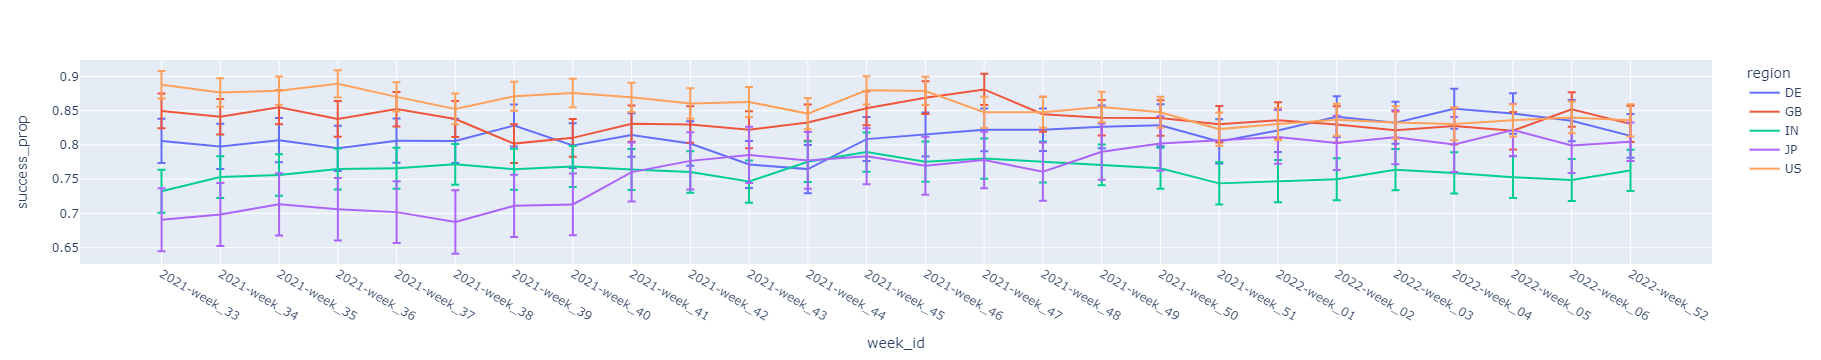

In [297]:
px.line(region_week_CI, x='week_id',y='success_prop', error_y='success_prop_ci',color='region')

### Rolling 4 weeks success rate and CI 

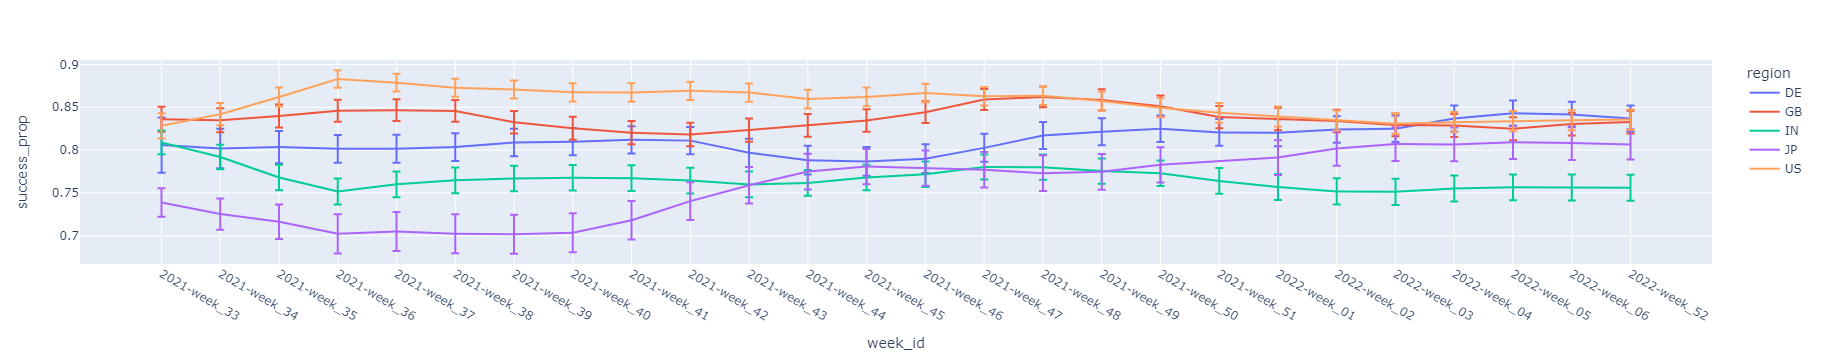

In [300]:
px.line(t2, x='week_id',y='success_prop', error_y='success_prop_ci',color='region')

### Proportion  graph

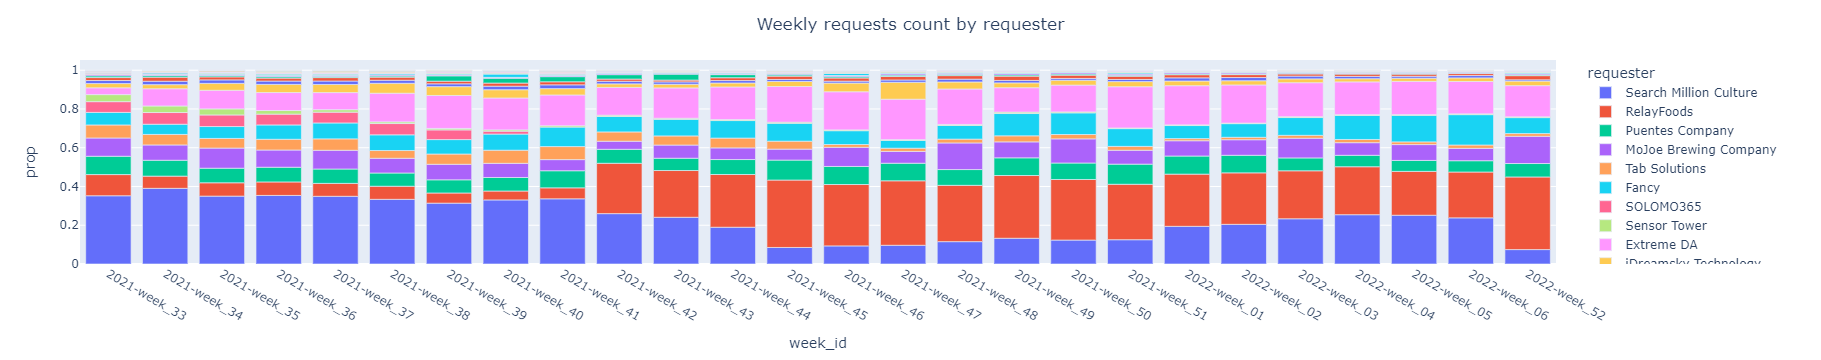

In [171]:
req_weekly = ad_recs_annotated.groupby(['week_id']).requester.value_counts(normalize=True).to_frame()
req_weekly.rename(columns={'requester':'prop'},inplace=True)
req_weekly=req_weekly.reset_index()
req_weekly

fig = px.bar(req_weekly , x='week_id',y='prop', color='requester')
fig.update_layout(title_text='Weekly requests count by requester', title_x=0.5)

## Appendix

Code to create weekly files:

In [ ]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)